In [5]:
import pandas as pd
import numpy as np
import cv2 as cv
from os.path import isfile, join


In [ ]:
!wget http://www.eyrignoux.com.fr/coursIA/deepLearning/facial-keypoints-data.zip
!unzip facial-keypoints-data.zip

In [6]:
df = pd.read_csv(join('data', 'gt.csv'))


In [51]:
def rotate_bound(image, angle):
  # grab the dimensions of the image and then determine the
  # center
  (h, w) = image.shape[:2]
  (cX, cY) = ((w-1) // 2.0, (h-1)// 2.0)
  # grab the rotation matrix (applying the negative of the
  # angle to rotate clockwise), then grab the sine and cosine
  # (i.e., the rotation components of the matrix)
  M = cv.getRotationMatrix2D((cX, cY), -angle, 1.0)
  cos = np.abs(M[0, 0])
  sin = np.abs(M[0, 1])

  # compute the new bounding dimensions of the image
  nW = int((h * sin) + (w * cos))
  nH = int((h * cos) + (w * sin))
  print (nW, nH)

  # adjust the rotation matrix to take into account translation
  M[0, 2] += ((nW-1) / 2.0) - cX
  M[1, 2] += ((nH-1) / 2.0) - cY

  # perform the actual rotation and return the image
  return M, cv.warpAffine(image, M, (nW, nH), flags=cv.INTER_CUBIC)


def rotated_coord(points,M):
    points = np.array(points)
    ones = np.ones(shape=(len(points),1))
    points_ones = np.concatenate((points,ones), axis=1)
    transformed_pts = M.dot(points_ones.T).T
    return transformed_pts

In [52]:
df

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,00000.jpg,51,51,127,60,169,65,203,52,68,77,85,75,110,82,160,87,171,79,193,84,156,144,92,174,140,180,168,179
1,00001.jpg,21,20,36,18,57,19,80,25,23,27,34,26,40,28,59,30,68,30,78,33,43,46,31,61,45,66,60,65
2,00002.jpg,23,116,39,83,47,57,56,19,36,115,40,96,47,87,59,60,59,41,62,31,91,86,106,122,115,100,121,81
3,00003.jpg,29,18,63,25,84,32,105,34,38,31,48,34,59,39,79,44,85,43,95,45,72,71,46,83,63,87,75,89
4,00004.jpg,31,53,76,44,107,38,136,33,40,67,52,62,73,64,104,58,115,50,129,49,111,105,72,137,106,132,126,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,05995.jpg,22,31,41,25,80,25,100,25,30,45,41,42,52,42,80,42,94,42,97,42,69,70,47,92,58,95,75,89
5996,05996.jpg,31,37,39,37,59,28,98,17,36,45,39,45,39,45,90,42,106,34,109,34,84,70,70,104,87,106,90,104
5997,05997.jpg,21,33,41,33,83,30,100,28,47,50,55,47,66,50,97,42,111,44,119,44,86,78,55,114,75,114,94,111
5998,05998.jpg,8,13,17,10,30,10,36,10,11,18,15,17,17,17,31,15,33,15,36,15,28,25,18,36,27,35,34,34


In [53]:
img = cv.imread("/content/data/images/00000.jpg")
#rotate by 90 angle for example
points = [[85,75],[171,79]]
M, rotated = rotate_bound(img, 5)
#find out the new locations
transformed_pts = rotated_coord(points,M)

283 283


In [54]:
transformed_pts[0][1]

82.28728318130938

In [55]:
import matplotlib.pyplot as plt

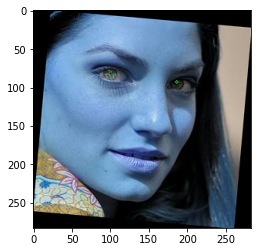

In [56]:
cv.circle(rotated, (int(transformed_pts[0][0]),int(transformed_pts[0][1])), 2, (0,255,0), 1)
cv.circle(rotated, (int(transformed_pts[1][0]),int(transformed_pts[1][1])), 2, (0,255,0), 1)

plt.imshow(rotated)
plt.show()

In [46]:
def visualize_img_points(image,points):
    
    x1 = int(points[0]) # x bb
    y1 = int(points[1]) # y bb
    x2 = int(points[2])
    y2 = int(points[3])
    print(x1,y1,x2,y2)

    cv.circle(image, (x1,y1), 2, (255,0,0), 1)
    cv.circle(image, (x2,y2), 2, (0,0,255), 1)
    #cv.rectangle(image, (xmin,ymin), (xmax,ymax), (0,255,0), 2)

    plt.imshow(image)
    plt.show()